# Multithreading

In [ ]:
# -- threading allow us to achieve concurent execution of multiple threads within a single process 
    # but it may not necessarily result in true parllel execution (depends on hardware and OS used).
# -- When multiple threads are running simultaneously, they are typically scheduled by the operating system to run on different processor cores. 
# -- If the system has multiple processor cores available, then it may be possible for multiple threads to execute in parallel on different cores,
    # leading to a true parallel execution.2222222

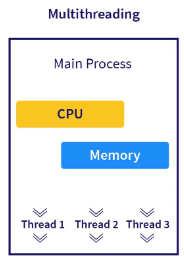

In [3]:
import threading
import time

def print_numbers():
    for i in range(1, 6):
        print(f"Thread: {threading.current_thread().name} Number: {i}")
        time.sleep(1)

t = threading.Thread(target=print_numbers) # Create a new thread

t.start() # Start the thread

for i in range(1, 4): # Do some other work while the thread is running
    print(f"Main Thread: {i}")
    time.sleep(1)

t.join() # Wait for the thread to finish

print("Done")


Thread: Thread-9 (print_numbers) Number: 1Main Thread: 1

Main Thread: 2Thread: Thread-9 (print_numbers) Number: 2

Main Thread: 3Thread: Thread-9 (print_numbers) Number: 3

Thread: Thread-9 (print_numbers) Number: 4
Thread: Thread-9 (print_numbers) Number: 5
Done


In [2]:
import threading

def func1(name):
    print("Hello", name, "from Function 1")
    
def func2(num):
    print("Function 2 received argument:", num)
    
def func3(lst):
    print("Function 3 received list:", lst)

if __name__ == '__main__':
    t1 = threading.Thread(target=func1, args=("Alice",))
    t2 = threading.Thread(target=func2, args=(42,))
    t3 = threading.Thread(target=func3, args=([[1,2,3], [4,5,6], [7,8,9]],))
    
    t1.start()
    t2.start()
    t3.start()
    
    t1.join()
    t2.join()
    t3.join()


Hello Alice from Function 1
Function 2 received argument: 42
Function 3 received list: [[1, 2, 3], [4, 5, 6], [7, 8, 9]]


In [2]:
import threading
from time import sleep

def count_numbers(thread_name, start, end):
    for i in range(start, end):
        print(f"{thread_name}: {i}")
        sleep(1)

# Create 4 threads
threads = []
threads.append(threading.Thread(target=count_numbers, args=("Thread 1", 10, 15)))
threads.append(threading.Thread(target=count_numbers, args=("Thread 2", 20, 25)))
threads.append(threading.Thread(target=count_numbers, args=("Thread 3", 30, 35)))
threads.append(threading.Thread(target=count_numbers, args=("Thread 4", 40, 45)))


# Start all threads
for thread in threads:
    thread.start()

# Wait for all threads to finish
for thread in threads:
    thread.join()

print("Done")


Thread 1: 10
Thread 2: 20
Thread 3: 30
Thread 4: 40
Thread 1: 11
Thread 2: 21
Thread 3: 31
Thread 4: 41
Thread 1: 12
Thread 2: 22
Thread 3: 32
Thread 4: 42
Thread 1: 13
Thread 2: 23
Thread 3: 33
Thread 4: 43
Thread 1: 14
Thread 3: 34
Thread 2: 24
Thread 4: 44
Done


In [ ]:
# Python threading ek aisa tarika hai jisse hum ek hi process ke andar bahut saare threads (chote units of execution)
# ko simultaneously run kar sakte hai.
# Har thread alag-alag tarah se run karta hai aur ve main process ke memory aur resources ko access kar sakte hai.
# Python ke threading module se hum threads ko create aur manage kar sakte hai.

# Jab hum Python mein Thread constructor ka use karte hai, 
# to hum usmein ek function ko pass karte hai jise hum execute karna chahte hai (jisko target function kaha jata hai),
# aur saath mein uss function ke liye zaroori arguments bhi pass karte hai. 
# Thread object fir ek naya thread of execution create karta hai, aur target function uss thread ke andar run karta hai.

# Jab threads create ho jate hai, to ve ek saath run karne lagte hai, 
# yani ve ek saath execute hone lagte hai (ya kam se kam ussi tarah se appear karte hai). 
# Operating system har thread ko ek processor core par run karne ke liye schedule karta hai, jisse ve concurrently run kar sake.

# join() method ko thread ko complete hone ka wait karne ke liye use kiya jata hai,
# jisse program ke baki hisse ka execution uske completion ke baad hi chalu ho sake.

# Threading jab hume tasks ko complete karne mein help karta hai,
# jaise ki I/O operations ke liye, ya fir computation ko speed up karne ke liye multiple processor cores ka use karne ke liye.
# Lekin threading synchronization aur race condition issues ko introduce kar sakta hai,
# isliye humein threading ko carefully aur caution ke saath use karna chahiye

# Multiprocessing

In [ ]:
# -- Multiprocessing is a way of achieving parallelism and concurrency in Python by allowing multiple processes to run simultaneously 
    # on a multi-core processor or on multiple processors in a computer.
# -- In multiprocessing, each process runs independently and has its own memory space.
# -- This allows processes to run in parallel and communicate with each other using interprocess communication (IPC) mechanisms 
    # such as pipes, queues, and shared memory.

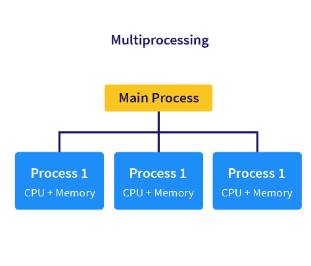

In [3]:
import multiprocessing

# A CPU-intensive task to be performed in parallel
def calculate_squares(numbers):
    squares = []
    for num in numbers:
        squares.append(num ** 2)
    return squares

if __name__ == '__main__':
    # Create a list of numbers to be squared
    numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

    # Create a multiprocessing Pool with 4 processes
    pool = multiprocessing.Pool(processes=4)

    # Split the numbers list into 4 chunks and apply the calculate_squares function to each chunk in parallel
    results = pool.map(calculate_squares, [numbers[:3], numbers[3:6], numbers[6:8], numbers[8:]])

    # Combine the results from each process into a single list of squares
    squares = []
    for result in results:
        squares.extend(result)

    # Print the list of squares
    print(squares)


In [ ]:
# 1. one example of multi threading
# 2. difference multithreading and multiprocessing
# 3. GIL

# Practice